# Movielens Case Study
DESCRIPTION : Background of Problem Statement :

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.
Problem Objective :

Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.
Domain: Entertainment
    
    1. Analysis Tasks to be performed:
        a. Import the three datasets    
        b. Create a new dataset [Master_Data] with the following columns 
              MovieID Title UserID Age Gender Occupation Rating.
              Hint: (i) Merge two tables at a time. 
                     (ii) Merge the tables using two primary keys MovieID & UserId)
        c. Explore the datasets using visual representations (graphs or tables),
            also include your comments on the following:
        d. User Age Distribution
        e. User rating of the movie “Toy Story”
        f. Top 25 movies by viewership rating
        g. Find ratings for all the movies reviewed by for a particular user of userid=2696

    2  Feature Engineering:
        Use column genres:
        a.Find out all the unique genres 
            (Hint: split the data in column genre making a list 
            and then process the data to find out only the unique categories of genres)
        b. Create a separate column for each genre category with a one-hot encoding 
            ( 1 and 0) whether or not the movie belongs to that genre. 
        c. Determine the features affecting the ratings of any particular movie.
        d. Develop an appropriate model to predict the movie ratings
-------------------------------------XXXXXXXXX-------------------------------------------

Dataset Description :

    These files contain 1,000,209 anonymous ratings of approximately 3,900 movies made by 6,040 MovieLens users who joined MovieLens in 2000.

Ratings.dat
Format - UserID::MovieID::Rating::Timestamp
Field 	Description
UserID 	Unique identification for each user
MovieID 	Unique identification for each movie
Rating 	User rating for each movie
Timestamp 	Timestamp generated while adding user review

    UserIDs range between 1 and 6040 
    The MovieIDs range between 1 and 3952
    Ratings are made on a 5-star scale (whole-star ratings only)
    A timestamp is represented in seconds since the epoch is returned by time(2)
    Each user has at least 20 ratings

     

Users.dat
Format -  UserID::Gender::Age::Occupation::Zip-code
Field 	Description
UserID 	Unique identification for each user
Genere 	Category of each movie
Age 	User’s age
Occupation 	User’s Occupation
Zip-code 	Zip Code for the user’s location

All demographic information is provided voluntarily by the users and is not checked for accuracy. Only users who have provided demographic information are included in this data set.

    Gender is denoted by an "M" for male and "F" for female
    Age is chosen from the following ranges:

 
Value 	Description
1 	"Under 18"
18 	"18-24"
25 	"25-34"
35 	"35-44"
45 	"45-49"
50 	"50-55"
56 	"56+"

 

    Occupation is chosen from the following choices:

Value
  	Description
0 	"other" or not specified
1 	"academic/educator"
2 	"artist”
3 	"clerical/admin"
4 	"college/grad student"
5 	"customer service"
6 	"doctor/health care"
7 	"executive/managerial"
8 	"farmer"
9 	"homemaker"
10 	"K-12 student"
11 	"lawyer"
12 	"programmer"
13 	"retired"
14 	 "sales/marketing"
15 	"scientist"
16 	 "self-employed"
17 	"technician/engineer"
18 	"tradesman/craftsman"
19 	"unemployed"
20 	"writer”


Movies.dat
Format - MovieID::Title::Genres
Field 	Description
MovieID 	Unique identification for each movie
Title 	A title for each movie
Genres 	Category of each movie

 

     Titles are identical to titles provided by the IMDB (including year of release)
    Genres are pipe-separated and are selected from the following genres:
    Action
    Adventure
    Animation
    Children's
    Comedy
    Crime
    Documentary
    Drama
    Fantasy
    Film-Noir
    Horror
    Musical
    Mystery
    Romance
    Sci-Fi
    Thriller
    War
    Western
    Some MovieIDs do not correspond to a movie due to accidental duplicate entries and/or test entries
    Movies are mostly entered by hand, so errors and inconsistencies may exist


In [40]:
# impirting library
import csv
import numpy as np  
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib inline

### solution: 1a. Import the three datasets

In [3]:
with open('../data/ratings.dat') as dat_file, open('../data/ratings.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file)
    featur_names = ['UserID','MovieID','Rating','Timestamp']
    csv_writer.writerow(featur_names)
    for line in dat_file:
        row = [field.strip() for field in line.split('::')]
        if len(row) == 4:
            csv_writer.writerow(row)
            
with open('../data/users.dat') as dat_file, open('../data/users.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file)
    featur_names = ['UserID','Genere','Age','Occupation','Zip_code']
    csv_writer.writerow(featur_names)
    for line in dat_file:
        row = [field.strip() for field in line.split('::')]
        if len(row) == 5:
            csv_writer.writerow(row)

with open('../data/movies.dat') as dat_file, open('../data/movies.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file)
    featur_names = ['MovieID','Title','Genres_1','Genres_2','Genres_3','Genres_4','Genres_5','Genres_6']
    csv_writer.writerow(featur_names)
    for line in dat_file:
        row = [field.strip() for field in line.split('::')]
        if len(row) == 3:
            csv_writer.writerow(row)


text = open('../data/movies.csv', "r") 
text = ''.join([i for i in text])           #join() method combines all contents of movies.csv and formed as a string 
text = text.replace("|", ",")               # search '|' and replace with ','   
x = open("../data/movies.csv","w") 
x.writelines(text) 
x.close()

In [4]:
df_ratings = pd.read_csv('../data/ratings.csv')

In [5]:
df_users = pd.read_csv('../data/users.csv')

In [6]:
df_movies = pd.read_csv('../data/movies.csv',encoding='ISO-8859-1')

In [7]:
Master_Data = pd.merge(df_ratings, df_movies, on='MovieID')

In [8]:
Master_Data = pd.merge(Master_Data, df_users, on='UserID')

### sol: 1b. Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. 

In [41]:
Master_Data

,UserID,MovieID,Rating,Timestamp,Title,Genres_1,Genres_2,Genres_3,Genres_4,Genres_5,Genres_6,Genere,Age,Occupation,Zip_code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,NaN,NaN,NaN,NaN,NaN,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation,Children's,Musical,NaN,NaN,NaN,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical,Romance,NaN,NaN,NaN,NaN,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,NaN,NaN,NaN,NaN,NaN,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation,Children's,Comedy,NaN,NaN,NaN,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,965319075,Footloose (1984),Drama,NaN,NaN,NaN,NaN,NaN,M,45,5,77662
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),Western,NaN,NaN,NaN,NaN,NaN,M,45,5,77662
1000206,4211,3840,4,965319197,Pumpkinhead (1988),Horror,NaN,NaN,NaN,NaN,NaN,M,45,5,77662
1000207,4211,3766,2,965319138,Missing in Action (1984),Action,War,NaN,NaN,NaN,NaN,M,45,5,77662


### Sol.1c. Explore the datasets using visual representations (graphs or tables)

In [10]:
#User Age Distribution
adf_age_rating_count = pd.DataFrame(Master_Data.groupby('Age')['Rating'].count().sort_values(ascending=False).head())
adf_age_rating_count

,Rating
Age,
25,395556
35,199003
18,183536
45,83633
50,72490


### 1d. User Age Distribution

In [11]:
import collections
age_column = list(df_users['Age'])

In [12]:
age_counter = dict(collections.Counter(age_column))
age_counter

{1: 222, 56: 380, 25: 2096, 45: 550, 50: 496, 35: 1193, 18: 1103}

In [13]:
sort_age_counter= {key: val for key, val in sorted(age_counter.items(), key = lambda ele: ele[0])}   
sort_age_counter

{1: 222, 18: 1103, 25: 2096, 35: 1193, 45: 550, 50: 496, 56: 380}

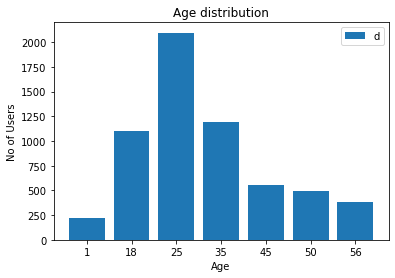

In [14]:
plt.bar(range(len(sort_age_counter)), list(sort_age_counter.values()), align='center')
plt.xticks(range(len(sort_age_counter)), list(sort_age_counter.keys()))

# Adding extra features     
plt.xlabel("Age") 
plt.ylabel("No of Users") 
plt.legend("destribution") 
plt.title('Age distribution') 
  
plt.show()

### 1e. User rating of the movie “Toy Story”

In [15]:
df_movie_rating_GP = pd.DataFrame(Master_Data.groupby('Title')['Rating'].mean().sort_values(ascending=False))
df_movie_rating_GP

,Rating
Title,
"Gate of Heavenly Peace, The (1995)",5.0
Lured (1947),5.0
Ulysses (Ulisse) (1954),5.0
Smashing Time (1967),5.0
Follow the Bitch (1998),5.0
...,...
Kestrel's Eye (Falkens öga) (1998),1.0
Windows (1980),1.0
Venice/Venice (1992),1.0


In [16]:
df_movie_rating_GP.loc["Toy Story 2 (1999)"]

Rating    4.218927
Name: Toy Story 2 (1999), dtype: float64

### Top 25 movies by viewership rating

In [17]:
df_movie_rating_GP.head(25)

,Rating
Title,
"Gate of Heavenly Peace, The (1995)",5.000000
Lured (1947),5.000000
Ulysses (Ulisse) (1954),5.000000
Smashing Time (1967),5.000000
Follow the Bitch (1998),5.000000
Song of Freedom (1936),5.000000
Bittersweet Motel (2000),5.000000
"Baby, The (1973)",5.000000
One Little Indian (1973),5.000000


### Sol: 1.g Find the ratings for all the movies reviewed by for a particular user of userid=2696

In [21]:
df_MovieRatings_2696 = Master_Data[['UserID','Title','Rating']]
df_MovieRatings_2696.query('UserID==2696')

,UserID,Title,Rating
953847,2696,Back to the Future (1985),2
953848,2696,E.T. the Extra-Terrestrial (1982),3
953849,2696,L.A. Confidential (1997),4
953850,2696,Lone Star (1996),5
953851,2696,JFK (1991),1
953852,2696,"Talented Mr. Ripley, The (1999)",4
953853,2696,Midnight in the Garden of Good and Evil (1997),4
953854,2696,Cop Land (1997),3
953855,2696,Palmetto (1998),4
953856,2696,"Perfect Murder, A (1998)",4


## 2. Feature Engineering: 

### 2.a Find out all the unique genres 

In [23]:
import more_itertools
generes = pd.DataFrame(Master_Data, columns= ['Genres_1','Genres_2','Genres_3','Genres_4','Genres_5','Genres_6'])
generes_nestedlist = generes.values.tolist()
Unique_generes_Set = set(more_itertools.collapse(generes_nestedlist))
Unique_generes_list = list(filter(lambda x: str(x) != 'nan', Unique_generes_Set))
Unique_generes_list

['Thriller',
 'Drama',
 'Documentary',
 'Fantasy',
 'Animation',
 "Children's",
 'Western',
 'Sci-Fi',
 'Musical',
 'Film-Noir',
 'Action',
 'Horror',
 'Romance',
 'Adventure',
 'Comedy',
 'Mystery',
 'War',
 'Crime']

### 2.b Create a separate column for each genre category 

In [45]:
Master_Data

,UserID,MovieID,Rating,Timestamp,Title,Genres_1,Genres_2,Genres_3,Genres_4,Genres_5,Genres_6,Genere,Age,Occupation,Zip_code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,NaN,NaN,NaN,NaN,NaN,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation,Children's,Musical,NaN,NaN,NaN,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical,Romance,NaN,NaN,NaN,NaN,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,NaN,NaN,NaN,NaN,NaN,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation,Children's,Comedy,NaN,NaN,NaN,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,965319075,Footloose (1984),Drama,NaN,NaN,NaN,NaN,NaN,M,45,5,77662
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),Western,NaN,NaN,NaN,NaN,NaN,M,45,5,77662
1000206,4211,3840,4,965319197,Pumpkinhead (1988),Horror,NaN,NaN,NaN,NaN,NaN,M,45,5,77662
1000207,4211,3766,2,965319138,Missing in Action (1984),Action,War,NaN,NaN,NaN,NaN,M,45,5,77662


In [83]:
Master_Data_withDummy = pd.get_dummies(Master_Data,prefix=['Genres_1','Genres_2','Genres_3','Genres_4','Genres_5','Genres_6'],columns=['Genres_1','Genres_2','Genres_3','Genres_4','Genres_5','Genres_6'],drop_first=True)
Master_Data_withDummy

,UserID,MovieID,Rating,Timestamp,Title,Genere,Age,Occupation,Zip_code,Genres_1_Adventure,...,Genres_4_Romance,Genres_4_Sci-Fi,Genres_4_Thriller,Genres_4_War,Genres_4_Western,Genres_5_Musical,Genres_5_Romance,Genres_5_Sci-Fi,Genres_5_Thriller,Genres_5_War
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,0
1,1,661,3,978302109,James and the Giant Peach (1996),F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,0
2,1,914,3,978301968,My Fair Lady (1964),F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3408,4,978300275,Erin Brockovich (2000),F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2355,5,978824291,"Bug's Life, A (1998)",F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,965319075,Footloose (1984),M,45,5,77662,0,...,0,0,0,0,0,0,0,0,0,0
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),M,45,5,77662,0,...,0,0,0,0,0,0,0,0,0,0
1000206,4211,3840,4,965319197,Pumpkinhead (1988),M,45,5,77662,0,...,0,0,0,0,0,0,0,0,0,0
1000207,4211,3766,2,965319138,Missing in Action (1984),M,45,5,77662,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
#Master_Data_withDummy.head(100).to_csv("Master_Data_withDummy.csv")

In [73]:
Only_Genres = Master_Data[['Genres_1','Genres_2','Genres_3','Genres_4','Genres_5','Genres_6']]
Only_Genres

,Genres_1,Genres_2,Genres_3,Genres_4,Genres_5,Genres_6
0,Drama,NaN,NaN,NaN,NaN,NaN
1,Animation,Children's,Musical,NaN,NaN,NaN
2,Musical,Romance,NaN,NaN,NaN,NaN
3,Drama,NaN,NaN,NaN,NaN,NaN
4,Animation,Children's,Comedy,NaN,NaN,NaN
...,...,...,...,...,...,...
1000204,Drama,NaN,NaN,NaN,NaN,NaN
1000205,Western,NaN,NaN,NaN,NaN,NaN
1000206,Horror,NaN,NaN,NaN,NaN,NaN
1000207,Action,War,NaN,NaN,NaN,NaN


In [74]:
OHE = pd.get_dummies(Master_Data,prefix=['Genres_1','Genres_2','Genres_3','Genres_4','Genres_5','Genres_6'],columns=['Genres_1','Genres_2','Genres_3','Genres_4','Genres_5','Genres_6'],drop_first=True)
OHE

,Genres_1_Adventure,Genres_1_Animation,Genres_1_Children's,Genres_1_Comedy,Genres_1_Crime,Genres_1_Documentary,Genres_1_Drama,Genres_1_Fantasy,Genres_1_Film-Noir,Genres_1_Horror,...,Genres_4_Romance,Genres_4_Sci-Fi,Genres_4_Thriller,Genres_4_War,Genres_4_Western,Genres_5_Musical,Genres_5_Romance,Genres_5_Sci-Fi,Genres_5_Thriller,Genres_5_War
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000206,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1000207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
Master_Data_Dummies = pd.concat([Master_Data,OHE],axis='column')
Master_Data_Dummies

ValueError: No axis named column for object type DataFrame

In [70]:
dummies = pd.get_dummies(list(Unique_generes_Set))

In [71]:
merged_dummies = pd.concat([Master_Data,dummies])
merged_dummies

,UserID,MovieID,Rating,Timestamp,Title,Genres_1,Genres_2,Genres_3,Genres_4,Genres_5,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1.0,1193.0,5.0,978300760.0,One Flew Over the Cuckoo's Nest (1975),Drama,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,661.0,3.0,978302109.0,James and the Giant Peach (1996),Animation,Children's,Musical,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,914.0,3.0,978301968.0,My Fair Lady (1964),Musical,Romance,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,3408.0,4.0,978300275.0,Erin Brockovich (2000),Drama,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,2355.0,5.0,978824291.0,"Bug's Life, A (1998)",Animation,Children's,Comedy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [72]:
merged_dummies.to_csv("merged_dummies.csv")

In [55]:
Only_Genres = Master_Data[['Genres_1','Genres_2','Genres_3','Genres_4','Genres_5','Genres_6']]
Only_Genres

,Genres_1,Genres_2,Genres_3,Genres_4,Genres_5,Genres_6
0,Drama,NaN,NaN,NaN,NaN,NaN
1,Animation,Children's,Musical,NaN,NaN,NaN
2,Musical,Romance,NaN,NaN,NaN,NaN
3,Drama,NaN,NaN,NaN,NaN,NaN
4,Animation,Children's,Comedy,NaN,NaN,NaN
...,...,...,...,...,...,...
1000204,Drama,NaN,NaN,NaN,NaN,NaN
1000205,Western,NaN,NaN,NaN,NaN,NaN
1000206,Horror,NaN,NaN,NaN,NaN,NaN
1000207,Action,War,NaN,NaN,NaN,NaN


In [68]:
dummepd.get_dummies(list(Unique_generes_Set))

In [69]:
OHE1 = pd.get_dummies(dummies)
OHE1.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [48]:
Master_Data.to_csv("Master_Data.csv",index=False)

In [49]:
testdatat = pd.read_csv('Master_Data_test.csv')

In [50]:
OHE = pd.get_dummies(testdatat,drop_first=True)

In [52]:
OHE.to_csv("OHE.csv",index=False)

In [43]:
Unique_generes_df = pd.DataFrame(Unique_generes_list)
#print(Unique_generes_df)
Unique_generes_df=Unique_generes_df.transpose()
print(Unique_generes_df)

         0      1            2        3          4           5        6   \
0  Thriller  Drama  Documentary  Fantasy  Animation  Children's  Western   

       7        8          9       10      11       12         13      14  \
0  Sci-Fi  Musical  Film-Noir  Action  Horror  Romance  Adventure  Comedy   

        15   16     17  
0  Mystery  War  Crime  


In [33]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 

df_Genres_Raw = Master_Data[['Genres_1','Genres_2','Genres_3','Genres_4','Genres_5','Genres_6']]
df_Genres_Raw

df_Genres_Raw['Genres_1']= le.fit_transform(df_Genres_Raw['Genres_1']) 
df_Genres_Raw['Genres_2']= le.fit_transform(df_Genres_Raw['Genres_2']) 
#df_Genres_Raw

<ipython-input-33-08d71c8776eb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Genres_Raw['Genres_1']= le.fit_transform(df_Genres_Raw['Genres_1'])
<ipython-input-33-08d71c8776eb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Genres_Raw['Genres_2']= le.fit_transform(df_Genres_Raw['Genres_2'])


In [25]:
temp = Master_Data.drop(['Genres_1','Genres_2','Genres_3','Genres_4','Genres_5','Genres_6'],axis = 'columns')
temp

,UserID,MovieID,Rating,Timestamp,Title,Genere,Age,Occupation,Zip_code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",F,1,10,48067
...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,965319075,Footloose (1984),M,45,5,77662
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),M,45,5,77662
1000206,4211,3840,4,965319197,Pumpkinhead (1988),M,45,5,77662
1000207,4211,3766,2,965319138,Missing in Action (1984),M,45,5,77662


In [26]:
Merged_master_data = pd.concat([Unique_generes_df,temp])
Merged_master_data

,0,1,2,3,4,5,6,7,8,9,...,17,Age,Genere,MovieID,Occupation,Rating,Timestamp,Title,UserID,Zip_code
0,Thriller,Drama,Documentary,Fantasy,Animation,Children's,Western,Sci-Fi,Musical,Film-Noir,...,Crime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,F,1193.0,10.0,5.0,978300760.0,One Flew Over the Cuckoo's Nest (1975),1.0,48067
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,F,661.0,10.0,3.0,978302109.0,James and the Giant Peach (1996),1.0,48067
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,F,914.0,10.0,3.0,978301968.0,My Fair Lady (1964),1.0,48067
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,F,3408.0,10.0,4.0,978300275.0,Erin Brockovich (2000),1.0,48067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.0,M,3791.0,5.0,2.0,965319075.0,Footloose (1984),4211.0,77662
1000205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.0,M,3806.0,5.0,3.0,965319138.0,MacKenna's Gold (1969),4211.0,77662
1000206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.0,M,3840.0,5.0,4.0,965319197.0,Pumpkinhead (1988),4211.0,77662
1000207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.0,M,3766.0,5.0,2.0,965319138.0,Missing in Action (1984),4211.0,77662


In [27]:
Merged_master_data = pd.concat([Master_Data,Unique_generes_df],ignore_index=True)
Merged_master_data

,0,1,2,3,4,5,6,7,8,9,...,Genres_4,Genres_5,Genres_6,MovieID,Occupation,Rating,Timestamp,Title,UserID,Zip_code
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1193.0,10.0,5.0,978300760.0,One Flew Over the Cuckoo's Nest (1975),1.0,48067
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,661.0,10.0,3.0,978302109.0,James and the Giant Peach (1996),1.0,48067
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,914.0,10.0,3.0,978301968.0,My Fair Lady (1964),1.0,48067
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3408.0,10.0,4.0,978300275.0,Erin Brockovich (2000),1.0,48067
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2355.0,10.0,5.0,978824291.0,"Bug's Life, A (1998)",1.0,48067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3806.0,5.0,3.0,965319138.0,MacKenna's Gold (1969),4211.0,77662
1000206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3840.0,5.0,4.0,965319197.0,Pumpkinhead (1988),4211.0,77662
1000207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3766.0,5.0,2.0,965319138.0,Missing in Action (1984),4211.0,77662
1000208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3834.0,5.0,2.0,965318885.0,Bronco Billy (1980),4211.0,77662


In [28]:
df_generes_OHE = pd.DataFrame()
df_generes_OHE

""


In [67]:
pd.get_dummies(list(Unique_generes_Set))

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [30]:
4-2

2